In [ ]:
pip install sentence_transformers

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,ConfusionMatrixDisplay


In [70]:
train=pd.read_csv('train_dataset.csv')
validation=pd.read_csv('validation_dataset.csv')
test=pd.read_csv('test_dataset.csv')



In [15]:
train_text=train.text[:-1]
train_spam=train.spam[:-1]
validation_text=validation.text[:-1]
validation_spam=validation.spam[:-1]
test_text=test.text[:-1]
test_spam=test.spam[:-1]

## Multinomial Naive Bayes

#### Training the Model on the training dataset

In [8]:
# Creating the frequency matrix
cv = CountVectorizer(min_df=0, max_df=1, binary = False, ngram_range = (1,3))

In [41]:
cv_train_text = cv.fit_transform(train_text)
cv_test_text = cv.transform(test_text)
cv_validation_text=cv.transform(validation_text)

In [43]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_train_spam = lb.fit_transform(train_spam)
lb_validation_spam=lb.fit_transform(validation_spam)
lb_test_spam = lb.fit_transform(test_spam)


In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_bow = mnb.fit(cv_train_text, lb_train_spam)
mnb_bow_predict = mnb.predict(cv_test_text)
mnb_bow_score = accuracy_score(lb_test_spam, mnb_bow_predict)
print("Accuracy :", mnb_bow_score*100," %")

Accuracy : 93.87040280210157  %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
def test_new(y_test,predicted):
  conf_matrix = confusion_matrix(y_test, predicted)
  precision = precision_score(y_test, predicted, average='weighted')
  recall = recall_score(y_test, predicted, average='weighted')
  print(f"precision :{precision} recall :{recall}")
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')

  plt.show()

In [37]:
mnb_predict=mnb.predict(cv_train_text)

In [44]:
mnb_predict_validation=mnb.predict(cv_validation_text)

precision :0.938610262315963 recall :0.9387040280210157


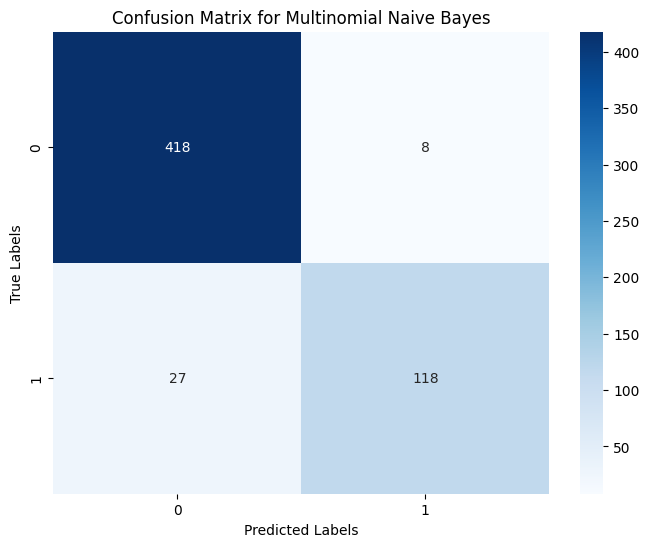

In [52]:
test(lb_test_spam,mnb_bow_predict)

#### Validating the model (MNB)

precision :0.9844707755579546 recall :0.9841467205470935


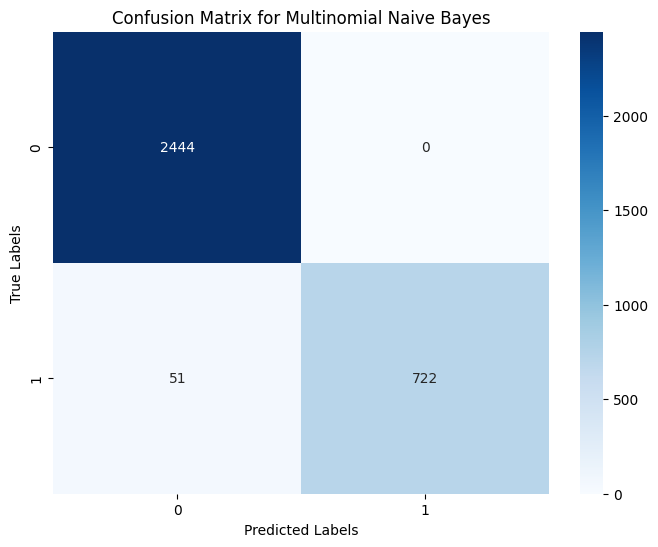

In [53]:
test(lb_train_spam,mnb_predict)

precision :0.937652048063007 recall :0.9379370629370629


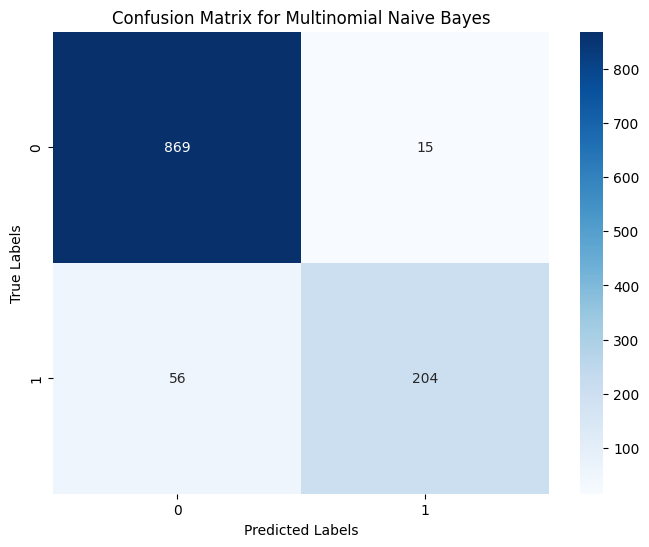

In [54]:
test(lb_validation_spam,mnb_predict_validation)

##### Cross Validation

In [56]:
parameters = {
    'vect__min_df': [0, 1, 2],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__alpha': [0.1, 0.5, 1.0],
    'clf__fit_prior': [True, False]
}


In [57]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [59]:
grid_search = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
grid_search.fit(validation_text,validation_spam)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'clf__fit_prior': [True, False],
                         'vect__max_df': [0.5, 0.75, 1.0],
                         'vect__min_df': [0, 1, 2],
                         'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [60]:
print("Best parameters set found on development set:")
print(grid_search.best_params_)

Best parameters set found on development set:
{'clf__alpha': 0.5, 'clf__fit_prior': False, 'vect__max_df': 0.5, 'vect__min_df': 2, 'vect__ngram_range': (1, 2)}


In [61]:
predicted_test = grid_search.predict(test_text)

In [64]:
predicted_train=grid_search.predict(train_text)

precision :0.9881709316747069 recall :0.9881877525645011


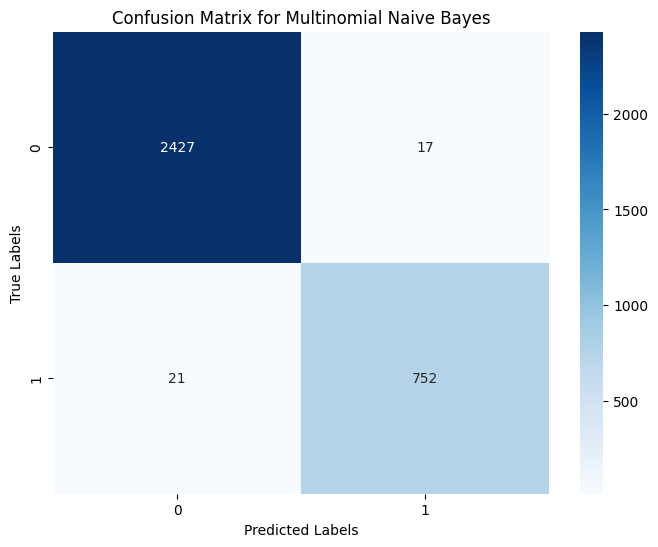

In [65]:
test(train_spam,predicted_train)

precision :0.9827661706552188 recall :0.9824868651488616


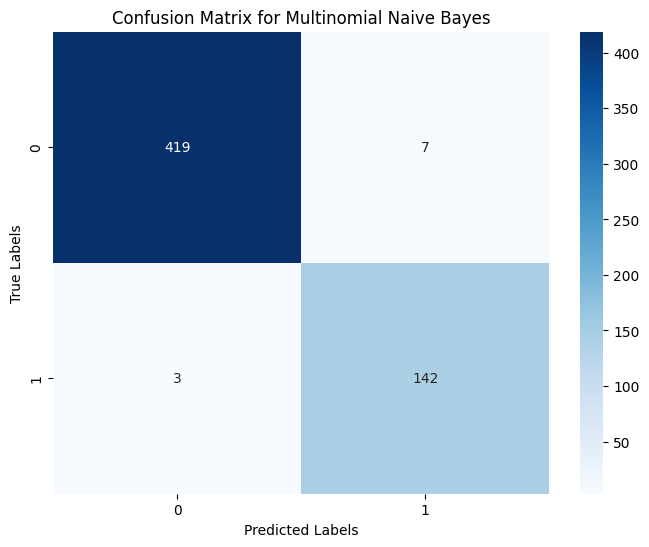

In [62]:
test(test_spam,predicted_test)

A Grid Search CV caused a reduction in Overfitting for the Multinomial Naive Bayes Model

## Logistic Regression

### Training the model on training dataset

In [103]:
from sentence_transformers import SentenceTransformer

In [105]:
# Initialize SentenceTransformer model
max_length=64
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [114]:
def create_embeddings(data):

  embeddings = model.encode(data['text'], convert_to_tensor=True)

  embedding_columns = [f"emb_{i}" for i in range(embeddings.shape[1])]
  embedding_df = pd.DataFrame(embeddings.numpy(), columns=embedding_columns)

  embedded_dataset = pd.concat([embedding_df,data['spam']], axis=1)
  return embedded_dataset


In [116]:
train_new=create_embeddings(train)


In [119]:
test_new=create_embeddings(test)
validation_new=create_embeddings(validation)

In [121]:
X_train=train_new.drop(['spam'],axis=1)
y_train=train_new['spam']
X_validation=validation_new.drop(['spam'],axis=1)
y_validation=validation_new['spam']
X_test=test_new.drop(['spam'],axis=1)
y_test=test_new['spam']

In [122]:
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)



Accuracy: 0.9772727272727273

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       427
           1       0.95      0.96      0.96       145

    accuracy                           0.98       572
   macro avg       0.97      0.97      0.97       572
weighted avg       0.98      0.98      0.98       572


Confusion Matrix:
[[420   7]
 [  6 139]]


In [127]:
# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train,y_pred_train)
print("Accuracy_test:", accuracy_test, "Accuracy_train:",accuracy_train)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy_test: 0.9772727272727273 Accuracy_train: 0.9927698828222389

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       427
           1       0.95      0.96      0.96       145

    accuracy                           0.98       572
   macro avg       0.97      0.97      0.97       572
weighted avg       0.98      0.98      0.98       572


Confusion Matrix:
[[420   7]
 [  6 139]]


precision :0.9773319242979672 recall :0.9772727272727273


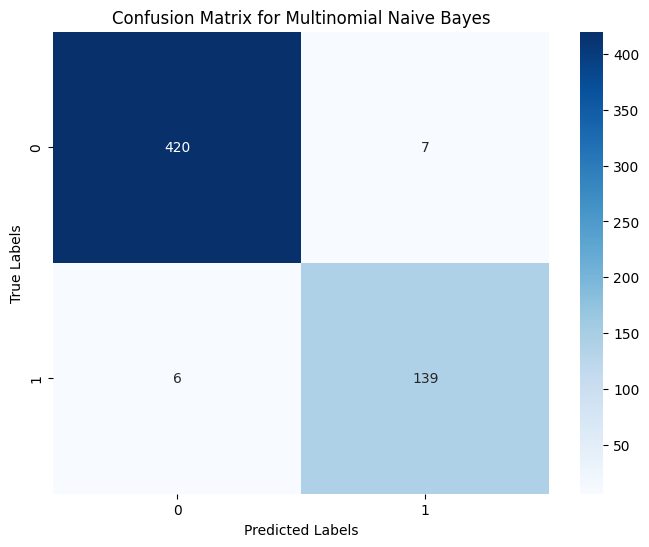

In [124]:
test_new(y_test,y_pred)

### Validating the model(Logistic Regression)

precision :0.99277907792551 recall :0.9927698828222389


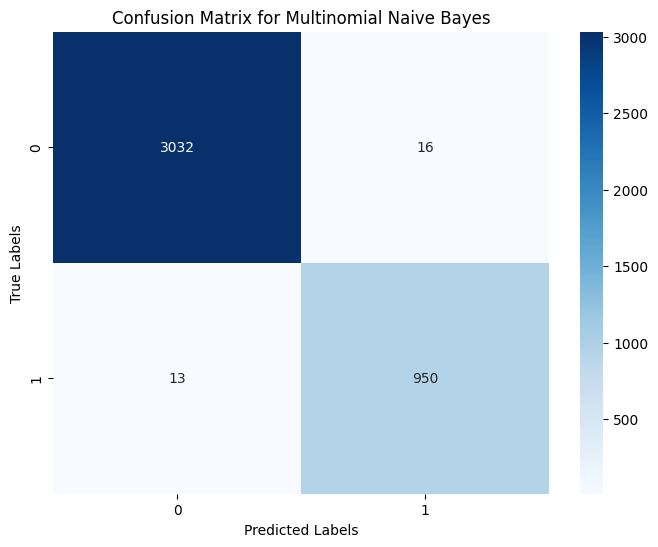

In [125]:
y_pred_train=logistic_reg.predict(X_train)
test_new(y_train,y_pred_train)

precision :0.9807733530701248 recall :0.9807860262008734


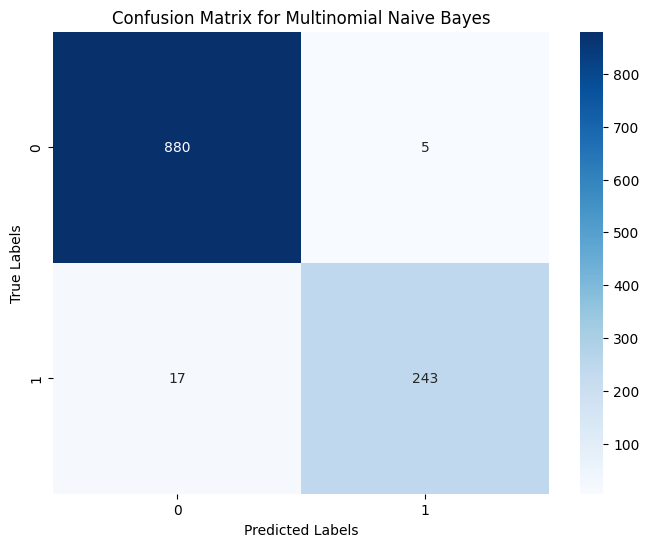

In [128]:
y_pred_val=logistic_reg.predict(X_validation)
test_new(y_validation,y_pred_val)

##### Cross Validation

In [131]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Optimization algorithm
    'class_weight': [None, 'balanced']     # Class weights
}

In [132]:
logistic_reg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X_validation, y_validation)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best hyperparameters: {'C': 1, 'class_weight': None, 'solver': 'newton-cg'}


precision :0.9757921439063716 recall :0.9758165046123162


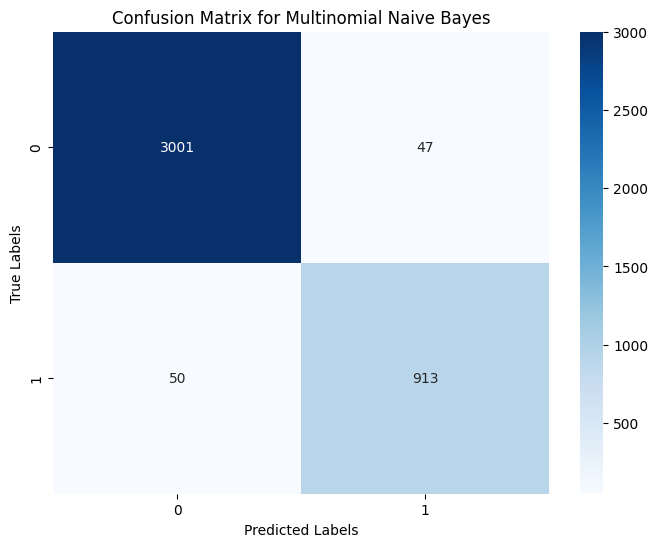

In [134]:
predicted_train=grid_search.predict(X_train)
test_new(y_train,predicted_train)

precision :0.977494379027398 recall :0.9772727272727273


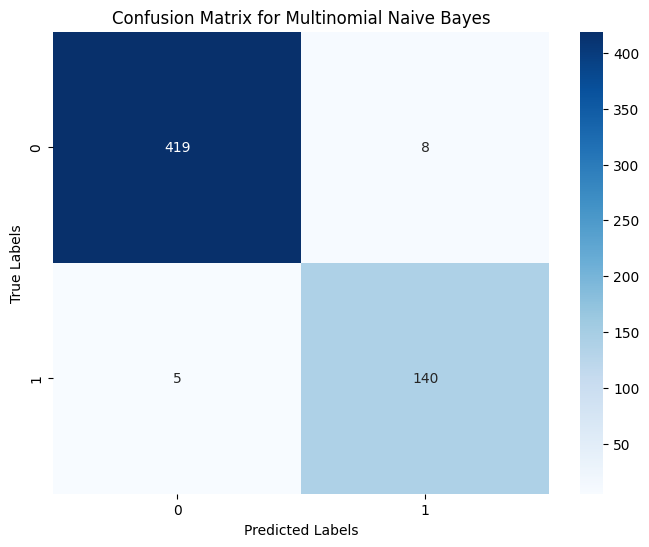

In [133]:
predicted_test=grid_search.predict(X_test)
test_new(y_test,predicted_test)


## SVM

### Training the model on training dataset

In [135]:
from sklearn.svm import SVC

In [136]:
svm_model = SVC(kernel='linear')  # Use linear kernel for simplicity, can also try other kernels like 'rbf'

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)
y_pred_train=svm_model.predict(X_train)
# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train,y_pred_train)
print("Accuracy_test:", accuracy_test, "Accuracy_train:",accuracy_train)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy_test: 0.9772727272727273 Accuracy_train: 0.9977561705310396

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       427
           1       0.96      0.95      0.96       145

    accuracy                           0.98       572
   macro avg       0.97      0.97      0.97       572
weighted avg       0.98      0.98      0.98       572


Confusion Matrix:
[[421   6]
 [  7 138]]


precision :0.9772284763523081 recall :0.9772727272727273


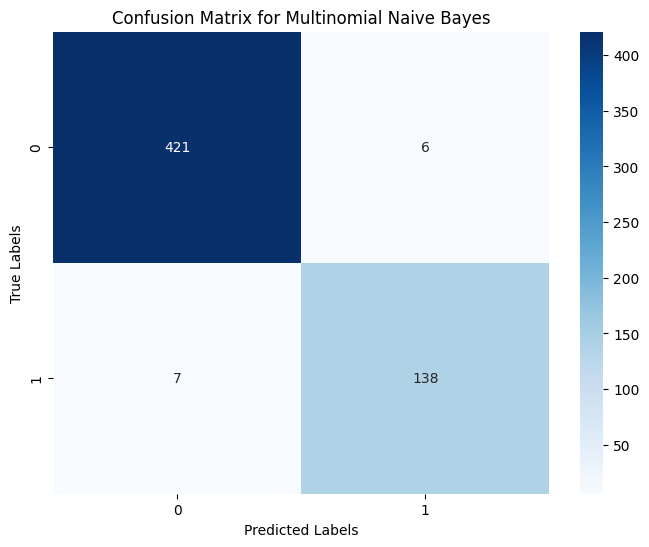

In [137]:
test_new(y_test,y_pred)

### Validating the model(SVM)

precision :0.9977555427269436 recall :0.9977561705310396


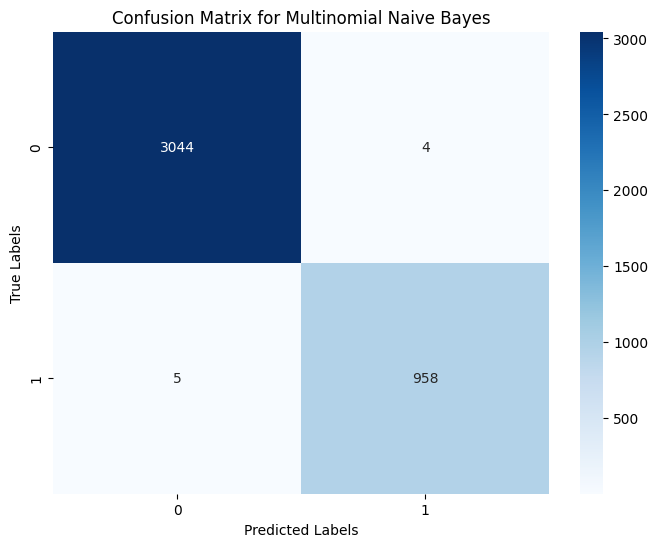

In [138]:
test_new(y_train,y_pred_train)

precision :0.9771887487497256 recall :0.977292576419214


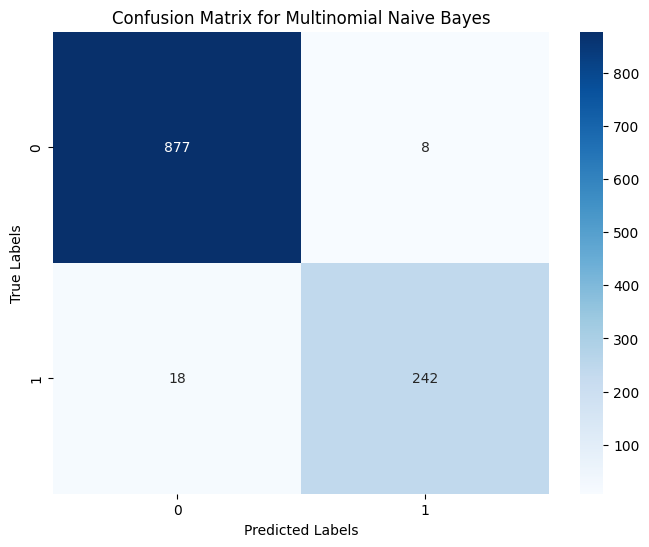

In [139]:
y_pred_val=svm_model.predict(X_validation)
test_new(y_validation,y_pred_val)


####Cross Validation

In [140]:
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
    'gamma': ['scale', 'auto'],          # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [2, 3, 4],                 # Degree of the polynomial kernel function ('poly')
    'class_weight': [None, 'balanced']   # Class weights
}

In [142]:
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X_validation, y_validation)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best hyperparameters: {'C': 10, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


precision :0.985252691897083 recall :0.9852904512590377


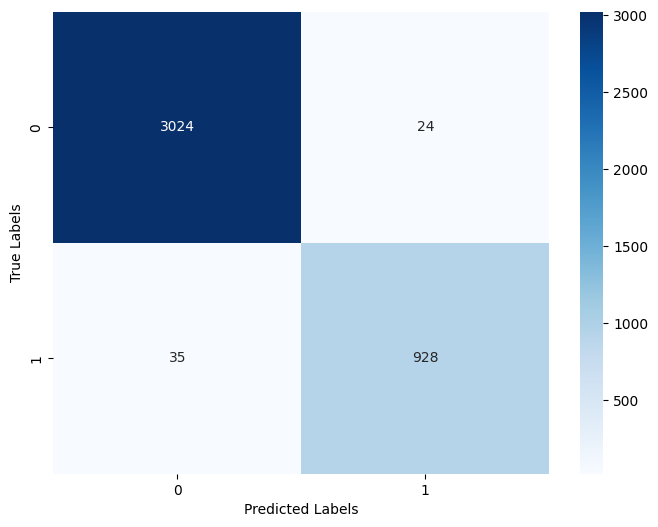

In [146]:
predicted_train=grid_search.predict(X_train)
test_new(y_train,predicted_train)

precision :0.9825174825174825 recall :0.9825174825174825


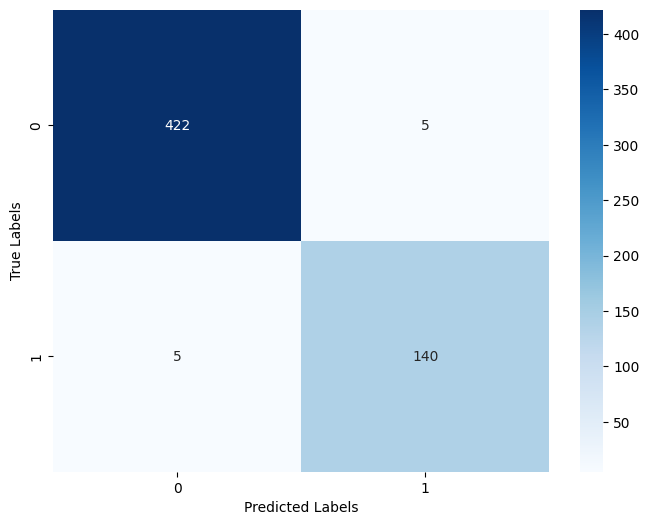

In [147]:
predicted_test=grid_search.predict(X_test)
test_new(y_test,predicted_test)